In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

In [2]:
#Reading the titanic dataset
df = pd.read_csv('titanic_train.csv')


In [3]:
#printing the first 5 rows of the dataset
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#finding more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# data description
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [6]:
#categorical values in the dataset
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
#checking empty values in the dataset
df.isnull().sum().sum()

866

<AxesSubplot:xlabel='Survived', ylabel='count'>

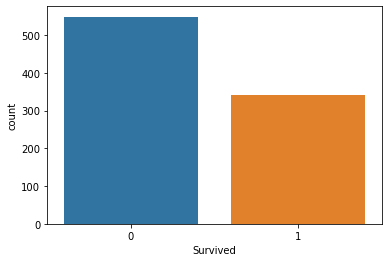

In [8]:
#finding number of survivors and non survivors in the dataset
sns.countplot(x='Survived', data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

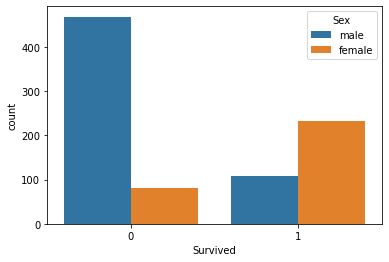

In [9]:
#finding number of survivors in relation to genders
sns.countplot(x='Survived', hue='Sex', data=df)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

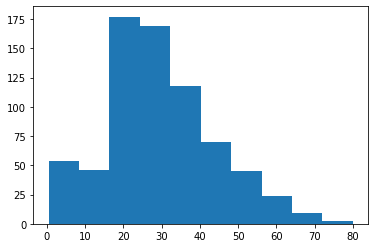

In [10]:
#Age distribution of the dataset without null values
plt.hist(df['Age'].dropna())

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

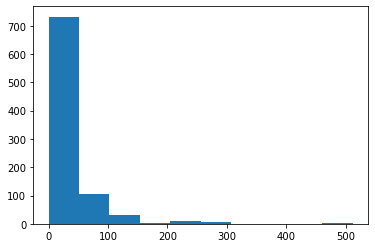

In [11]:
#tICKET price distribution of the dataset
plt.hist(df['Fare'])

In [12]:
#Checking the null values in the data
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

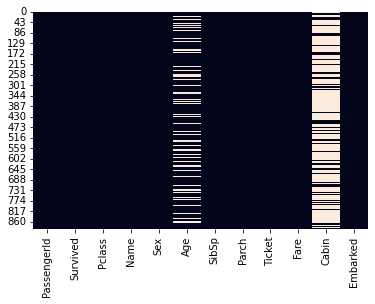

In [13]:
#Visualizing the null values in the dataset
sns.heatmap(df.isnull(), cbar=False)

In [14]:
#determing mean age value for each passenger class
#Pclass value 1

df[df['Pclass'] == 1]['Age'].mean()

#Pclass value 2

df[df['Pclass'] == 2]['Age'].mean()

#Pclass 3

df[df['Pclass'] == 2]['Age'].mean()

29.87763005780347

In [15]:
#performing imputation on missing age values.
def impute_missing_age(columns):

    age = columns[0]

    passenger_class = columns[1]

    

    if pd.isnull(age):

        if(passenger_class == 1):

            return df[df['Pclass'] == 1]['Age'].mean()

        elif(passenger_class == 2):

            return df[df['Pclass'] == 2]['Age'].mean()

        elif(passenger_class == 3):

            return df[df['Pclass'] == 3]['Age'].mean()

        

    else:

        return age

In [16]:
#Applying the imputation function on the age feature
df['Age'] = df[['Age', 'Pclass']].apply(impute_missing_age, axis = 1)

<AxesSubplot:>

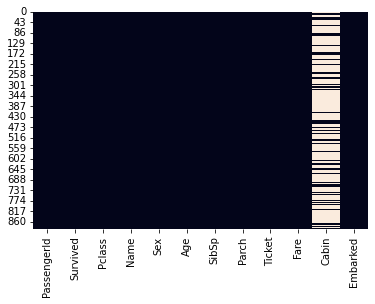

In [17]:
#visualizing to check if the age feature is filled or not
sns.heatmap(df.isnull(), cbar=False)

In [18]:
#Removing the cabin feature from the dataset
df.drop('Cabin', axis=1, inplace = True)

In [19]:
#Removing null variables in the dataset
df.dropna(inplace = True)

In [20]:
#creating dummy variables for the categorical features in the dataset
sex_data = pd.get_dummies(df['Sex'], drop_first = True)

embarked_data = pd.get_dummies(df['Embarked'], drop_first = True)

In [21]:
#Inserting the dummy variable s into our dataset
df = pd.concat([df, sex_data, embarked_data], axis = 1)

In [22]:
#showing the new dataset
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'male', 'Q', 'S'],
      dtype='object')


In [23]:
#Removing unnecessary features from the dataset
df.drop(['Name', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace = True)

In [24]:
#Showing new dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')

In [25]:
#printing the entire rows in the dataset
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [26]:
#creating x dependent and y independent variables.
y_data = df['Survived']

x_data = df.drop('Survived', axis = 1)

In [27]:
#importing train, test,split function 
from sklearn.model_selection import train_test_split
#Training the dataset
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

In [28]:
# Importing Classifier algortihms

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE


In [29]:
#creating a logistic regression model
model = LogisticRegression()

In [30]:
from sklearn.feature_selection import RFE
# #Selecting the Best important features according to Logistic Regression
rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 2, step = 1)
rfe_selector.fit(x_training_data, y_training_data)
x_data.columns[rfe_selector.get_support()]

C:\Users\C4A-L00056\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\C4A-L00056\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Index(['Pclass', 'male'], dtype='object')

In [31]:
#Applying the model and running the accuracy to the nearest hundred
#Training the model
model.fit(x_data,y_data)



C:\Users\C4A-L00056\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
#Applying the model and running the accuracy to the nearest hundred
y_pred_log_reg = model.predict(x_test_data)
acc_log_reg = round( model.score(x_training_data, y_training_data) * 100, 2)

In [33]:
#printing the accuracy of the model.
print (str(acc_log_reg) + ' percent')

78.94 percent


In [34]:
#creating a Knn model
model = KNeighborsClassifier(n_neighbors = 3)
#Training the model
model.fit(x_data,y_data)




KNeighborsClassifier(n_neighbors=3)

In [35]:
#Applying the model and running the accuracy to the nearest hundred

y_pred_knn = model.predict(x_test_data)

acc_knn = round( model.score(x_training_data, y_training_data) * 100, 2)

In [36]:
print (str(acc_knn) + ' percent')

80.06 percent


## General Observation 
1.The accuracy of the models used are not far from each other.

2.After implementing the RFE selection technique on them.